<a href="https://colab.research.google.com/github/Jayraj-Khinvasara/IMPROVEMENT-IN-DEPARTMENT-S-BUDGET/blob/main/Minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("department_budget.csv")

print(data.head())


       Expense Category  Budgeted Amount  Actual Amount      Variance  \
0  Technology Equipment         25079.52   32597.981039   7518.461039   
1  Technology Equipment         79082.19   77536.929900  -1545.260100   
2     Employee Benefits         41232.19   45567.943651   4335.753651   
3  Technology Equipment         68265.66   81241.300462  12975.640462   
4       Travel Expenses         59848.43   67176.888066   7328.458066   

   Variance %                              Comments  
0       29.98       High due to unexpected upgrades  
1       -1.95       High due to unexpected upgrades  
2       10.52  Lower due to reduced benefits claims  
3       19.01       High due to unexpected upgrades  
4       12.25    Under budget due to reduced travel  


In [2]:
# Calculate summary statistics for each expense category
summary = data.groupby("Expense Category").agg({
    "Budgeted Amount": ["mean", "sum"],
    "Actual Amount": ["mean", "sum"],
    "Variance": ["mean", "sum"],
    "Variance %": "mean"
}).reset_index()

print(summary)


           Expense Category Budgeted Amount               Actual Amount  \
                                       mean           sum          mean   
0           Consulting Fees    54791.787739  1.088165e+08  59888.039710   
1         Employee Benefits    55580.687948  1.121618e+08  59933.607714   
2        Marketing Expenses    55149.658812  1.095824e+08  59800.144063   
3    Miscellaneous Expenses    55396.118369  1.124541e+08  59742.444844   
4           Office Supplies    55241.625818  1.144054e+08  58758.974139   
5        Salaries and Wages    54563.330670  1.083628e+08  58341.046853   
6      Technology Equipment    55998.380235  1.097008e+08  61403.480515   
7  Training and Development    55248.838373  1.096689e+08  59194.370984   
8           Travel Expenses    54982.527293  1.111197e+08  59471.255232   
9                 Utilities    53872.153505  1.054278e+08  58040.725908   

                    Variance               Variance %  
            sum         mean           sum 

In [3]:
# Identify categories with the highest negative variance
high_variance = data[data["Variance"] < 0].groupby("Expense Category").agg({
    "Variance": "sum",
    "Variance %": "mean"
}).sort_values(by="Variance", ascending=True)

print(high_variance)


                              Variance  Variance %
Expense Category                                  
Training and Development -4.718463e+06  -10.303407
Employee Benefits        -4.698464e+06  -10.091995
Office Supplies          -4.656057e+06   -9.770473
Miscellaneous Expenses   -4.632686e+06  -10.192780
Travel Expenses          -4.528700e+06  -10.302312
Technology Equipment     -4.489793e+06   -9.880615
Utilities                -4.483953e+06  -10.044478
Salaries and Wages       -4.374513e+06   -9.898965
Marketing Expenses       -4.334174e+06  -10.015064
Consulting Fees          -4.246166e+06  -10.275092


In [4]:
# Identify underutilized budget categories
under_budget = data[data["Variance"] > 0].groupby("Expense Category").agg({
    "Variance": "sum",
    "Variance %": "mean"
}).sort_values(by="Variance", ascending=False)

print(under_budget)


                              Variance  Variance %
Expense Category                                  
Technology Equipment      1.507838e+07   22.790895
Consulting Fees           1.436732e+07   20.242288
Travel Expenses           1.360042e+07   19.769435
Marketing Expenses        1.357469e+07   21.211455
Employee Benefits         1.348266e+07   20.694088
Miscellaneous Expenses    1.345573e+07   19.878835
Utilities                 1.264185e+07   19.963945
Training and Development  1.255034e+07   19.883772
Office Supplies           1.194049e+07   17.618855
Salaries and Wages        1.187706e+07   19.311390


In [5]:
# Create a summary report
report = {
    "Total Budgeted Amount": data["Budgeted Amount"].sum(),
    "Total Actual Amount": data["Actual Amount"].sum(),
    "Total Variance": data["Variance"].sum(),
    "Top Over-Budget Categories": high_variance.head(5).index.tolist(),
    "Top Under-Budget Categories": under_budget.head(5).index.tolist()
}

print(report)

{'Total Budgeted Amount': 1101700255.98, 'Total Actual Amount': 1189106223.1693776, 'Total Variance': 87405967.18937744, 'Top Over-Budget Categories': ['Training and Development', 'Employee Benefits', 'Office Supplies', 'Miscellaneous Expenses', 'Travel Expenses'], 'Top Under-Budget Categories': ['Technology Equipment', 'Consulting Fees', 'Travel Expenses', 'Marketing Expenses', 'Employee Benefits']}


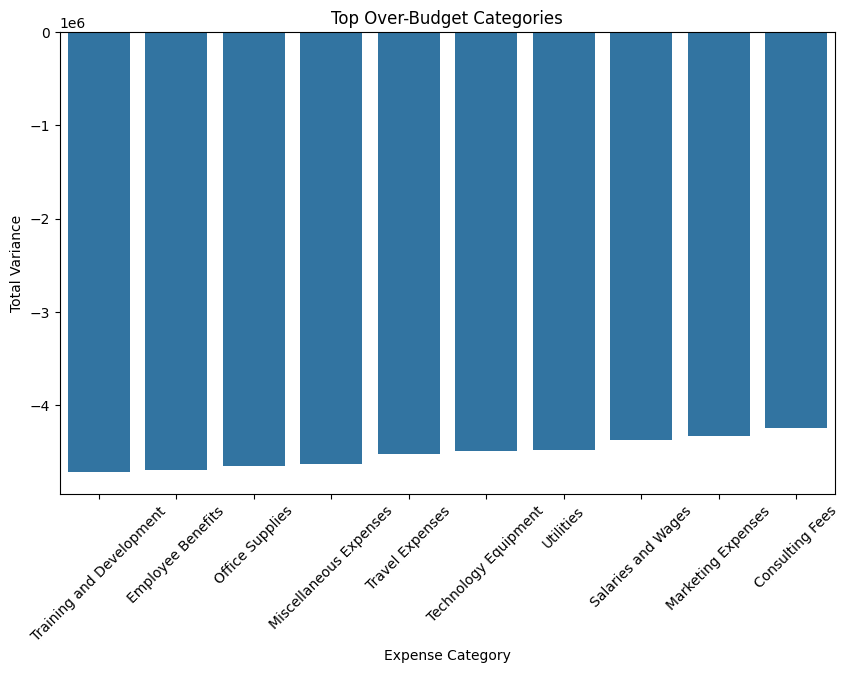

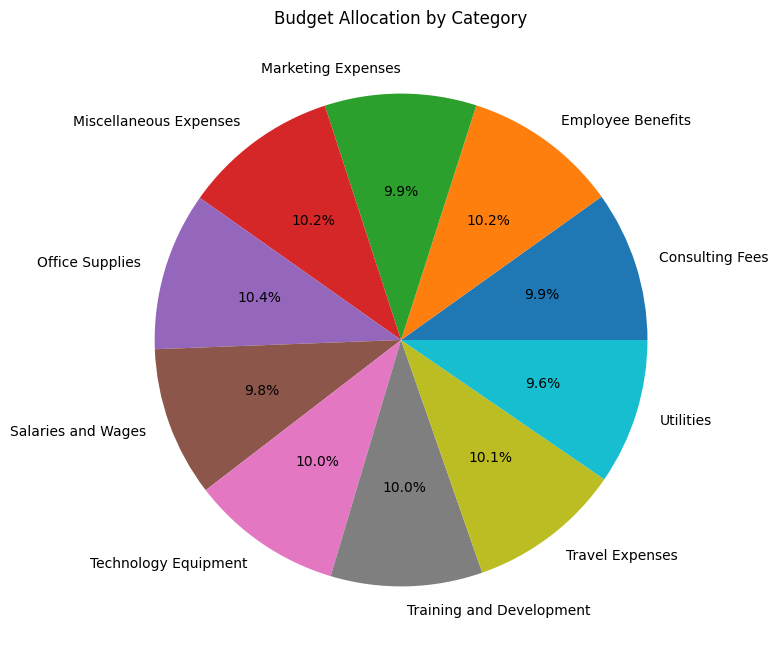

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of total variance by category
plt.figure(figsize=(10, 6))
sns.barplot(x=high_variance.index, y=high_variance["Variance"])
plt.title("Top Over-Budget Categories")
plt.xlabel("Expense Category")
plt.ylabel("Total Variance")
plt.xticks(rotation=45)
plt.show()

# Pie chart of budget allocation by category
plt.figure(figsize=(8, 8))
data.groupby("Expense Category")["Budgeted Amount"].sum().plot.pie(autopct='%1.1f%%')
plt.title("Budget Allocation by Category")
plt.ylabel("")
plt.show()
